In [1]:
import pandas as pd
import numpy as np

%pylab inline
import matplotlib.pyplot as plt
from ipynotifyer import notifyOnComplete as nf

Populating the interactive namespace from numpy and matplotlib


In [2]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [3]:
cr = pd.read_csv('data/processed.csv',index_col=0)[['Yexp','Pexp',
                                                    'gender','income',
                                                    'city_y', 'ind', 'reg']]

cr.city_y.replace('Kyiv','Kiev', inplace=1)
cr.gender.replace('unknown', np.nan, inplace=1)

In [4]:
cr.head()

,Yexp,Pexp,gender,income,city_y,ind,reg
0,1.55,5,male,1560000,NaN,design,NaN
1,0.25,4,male,960000,StPetersburg,design,StPetersburg
2,0.25,4,male,960000,StPetersburg,design,StPetersburg
3,0.25,4,male,960000,StPetersburg,design,StPetersburg
4,0.25,4,male,960000,StPetersburg,design,StPetersburg


In [5]:

# .LinearRegression

In [11]:
# create dummy (binary) variables from categorical ones
cr_d = pd.get_dummies(cr[['Yexp','Pexp','gender','ind','reg']])
y = cr['income']

In [12]:
cr_d.head(2)

,Yexp,Pexp,gender_female,gender_male,ind_design,ind_dev,ind_management,ind_other,reg_?,reg_Asia,reg_Belorus,reg_Europe,reg_ME,reg_Moscow,reg_Russia,reg_StPetersburg,reg_US,reg_Ukraine,reg_Uzbekistan
0,1.55,5,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.25,4,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [13]:
mask = (y < 6000000 )* (y>1000)

/Users/casy/anaconda/lib/python2.7/site-packages/pandas/computation/expressions.py:190: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))


In [21]:
X = cr_d[mask]
y = y[mask]

In [22]:
def NormDF(df, axis=0):
    return (df - df.mean(axis))/df.std(axis)

In [23]:
# X = NormDF(X)

In [24]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     683.7
Date:                Thu, 14 Apr 2016   Prob (F-statistic):               0.00
Time:                        20:25:15   Log-Likelihood:                -63059.
No. Observations:                4233   AIC:                         1.262e+05
Df Residuals:                    4214   BIC:                         1.263e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Yexp             -7.663e+04   5964.716  

In [16]:
pp = pd.DataFrame({'real': y, 'predicted':results.predict()})
pp.head(2)

,predicted,real
0,1540470.616534,1560000
1,1145854.057492,960000


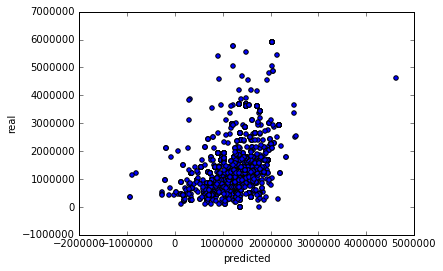

In [17]:
# pp[(pp.predicted>0)&(pp.real>0)].plot.scatter(x='predicted',y='real', loglog=1)
pp.plot.scatter(x='predicted',y='real')

In [58]:
X = cr_d[cr_d.income<10000000][['Yexp', 'Pexp', 'gender_female', 'gender_male']]
y = cr_d[cr_d.income<10000000]['income']

In [59]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     2043.
Date:                Thu, 14 Apr 2016   Prob (F-statistic):               0.00
Time:                        16:28:26   Log-Likelihood:                -64330.
No. Observations:                4254   AIC:                         1.287e+05
Df Residuals:                    4250   BIC:                         1.287e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Yexp          -6.946e+04   7276.950     -9.545

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
logit_classifier = LogisticRegression(penalty="l1", solver='liblinear', verbose=2)
logit_classifier.fit(X=X, y=y)

logit_predictions = logit_classifier.predict_proba(pred_test)[:, 1]

ValueError: Unknown label type: array([ 1560000.,   960000.,   960000., ...,  1690000.,   660000.,
         996012.])